[Source](https://github.com/paulvangentcom/heartrate_analysis_python/blob/master/examples/5_noisy_ECG/Analysing_Noisy_ECG.ipynb)

[Library](https://python-heart-rate-analysis-toolkit.readthedocs.io/en/latest/heartpy.heartpy.html)

In [1]:
!pip install pyvital vitaldb vital
!pip install neurokit2
!pip install heartpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.0/55.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 7.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.7/824.7 kB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 428.8/428.8 kB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 89.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 5.9 

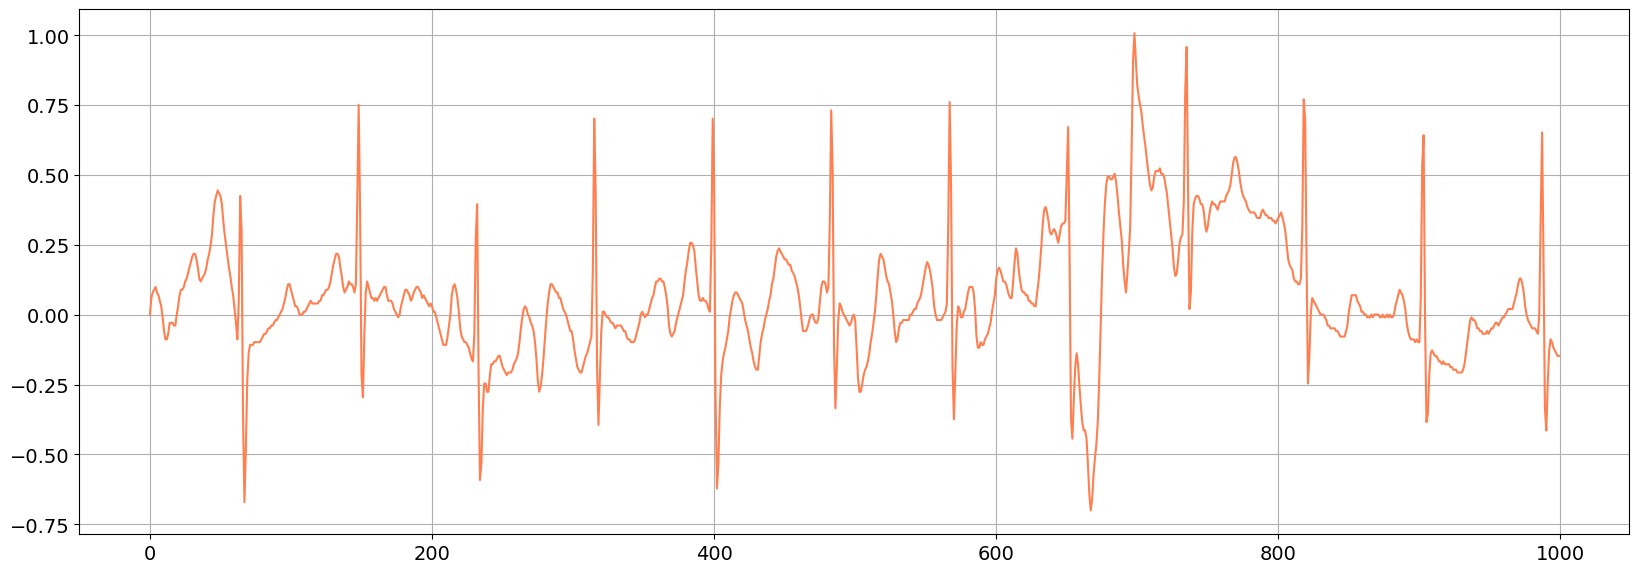

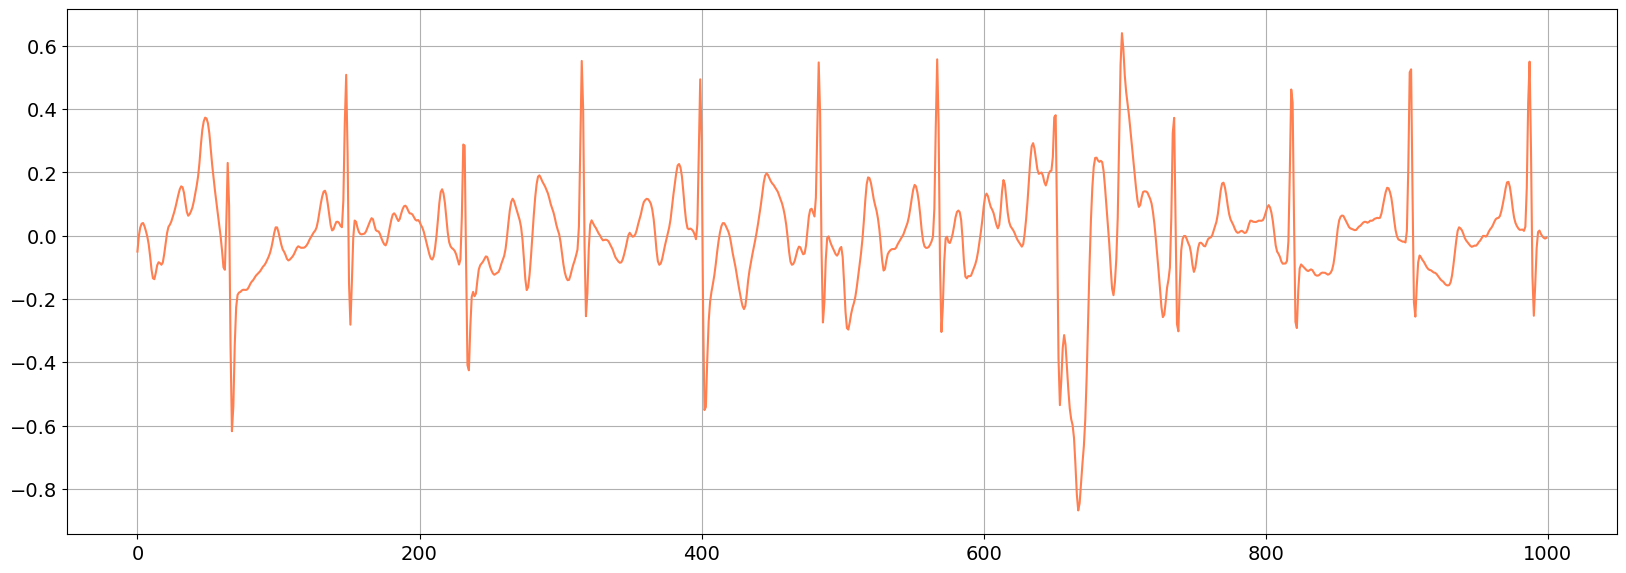

In [2]:

import vitaldb
import neurokit2 as nk
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['font.size']= 14




srate = 100
vals = vitaldb.load_case(10, ['SNUADC/ECG_II','SNUADC/ART'], 1 / srate)

signal = vals[:,0][np.logical_not(np.isnan(vals[:,0]))]

ecg = signal[110000:111000]#vals[110000:111000, 0]
art = vals[110000:111000, 1]

def nrml_plt(sig):
  plt.figure(figsize=(20,15))
  plt.subplot(211)
  plt.plot(sig, color='coral')
  plt.grid(True)
  plt.show()


nrml_plt(ecg)
ecg = nk.ecg_clean(ecg, sampling_rate=srate)
nrml_plt(ecg)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import heartpy as hp

sample_rate = 100

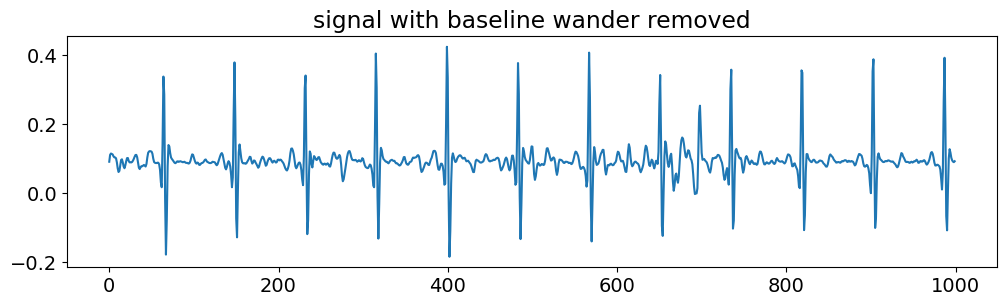

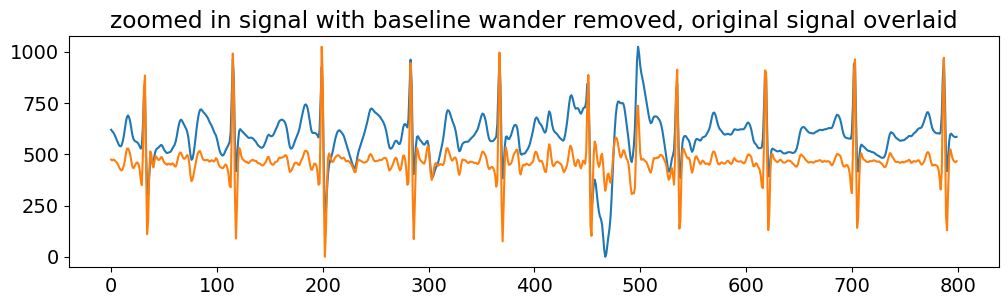

In [4]:
def filter_and_visualise(data, sample_rate):
    '''
    function that filters using remove_baseline_wander
    and visualises result
    '''

    filtered = hp.remove_baseline_wander(data, sample_rate)

    plt.figure(figsize=(12,3))
    plt.title('signal with baseline wander removed')
    plt.plot(filtered)
    plt.show()

    #And let's plot both original and filtered signal, and zoom in to show peaks are not moved
    #We'll also scale both signals with hp.scale_data
    #This is so that they have the same amplitude so that the overlap is better visible
    plt.figure(figsize=(12,3))
    plt.title('zoomed in signal with baseline wander removed, original signal overlaid')
    plt.plot(hp.scale_data(data[200:1200]))
    plt.plot(hp.scale_data(filtered[200:1200]))
    plt.show()

    return filtered

filtered = filter_and_visualise(ecg, sample_rate)

bpm: 71.599045
ibi: 838.000000
sdnn: 4.000000
sdsd: 5.000000
rmssd: 7.071068
pnn20: 0.000000
pnn50: 0.000000
hr_mad: 0.000000
sd1: 5.000000
sd2: 3.535534
s: 55.536037
sd1/sd2: 1.414214
breathingrate: 0.238663


<Figure size 1200x400 with 0 Axes>

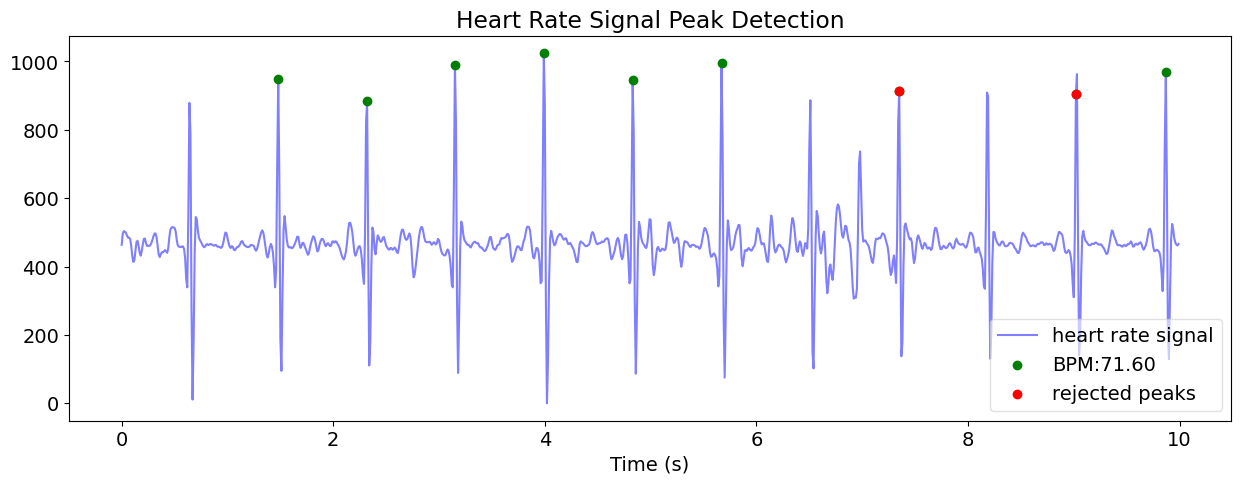

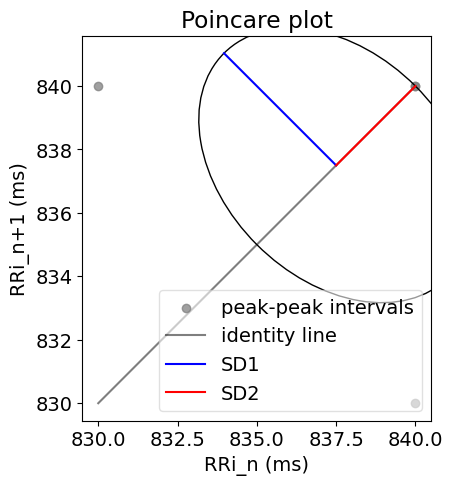

In [5]:
wd, m = hp.process(hp.scale_data(filtered), sample_rate)

plt.figure(figsize=(12,4))
hp.plotter(wd, m)

for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

#plot poincare
hp.plot_poincare(wd, m)

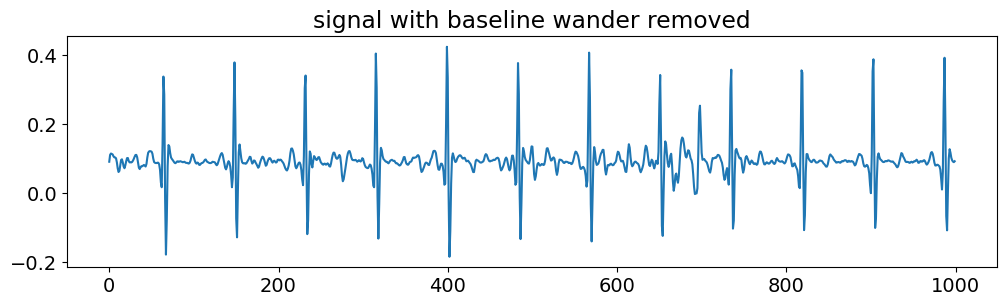

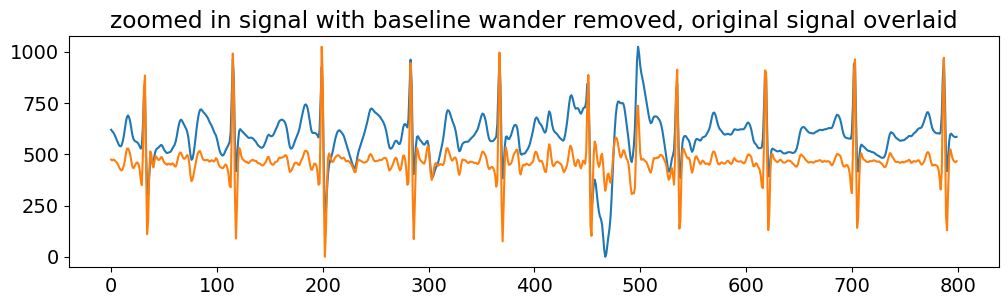

bpm: 71.599045
ibi: 838.000000
sdnn: 4.000000
sdsd: 5.000000
rmssd: 7.071068
pnn20: 0.000000
pnn50: 0.000000
hr_mad: 0.000000
sd1: 5.000000
sd2: 3.535534
s: 55.536037
sd1/sd2: 1.414214
breathingrate: 0.238663


<Figure size 1200x400 with 0 Axes>

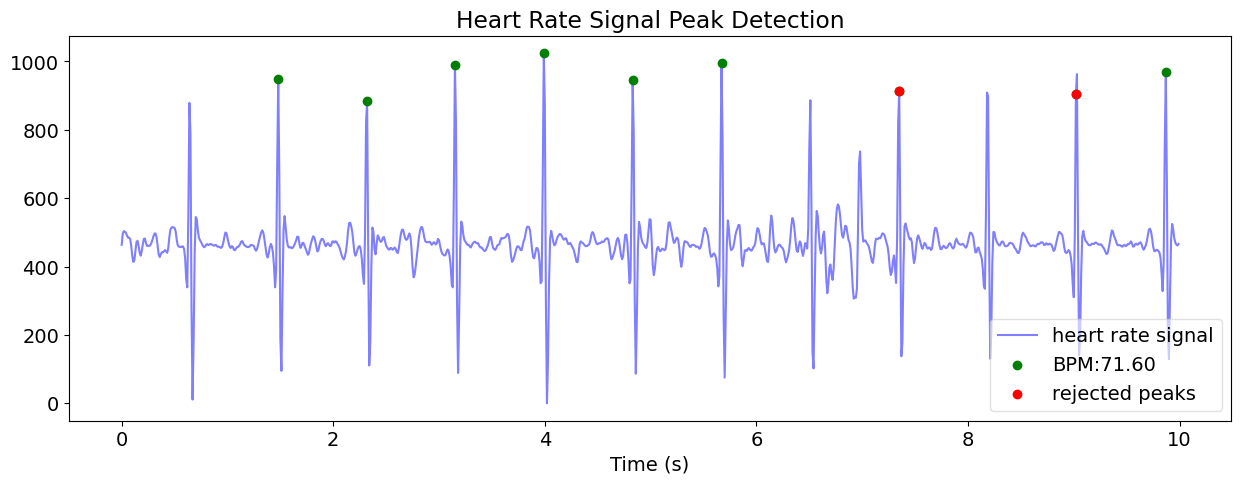

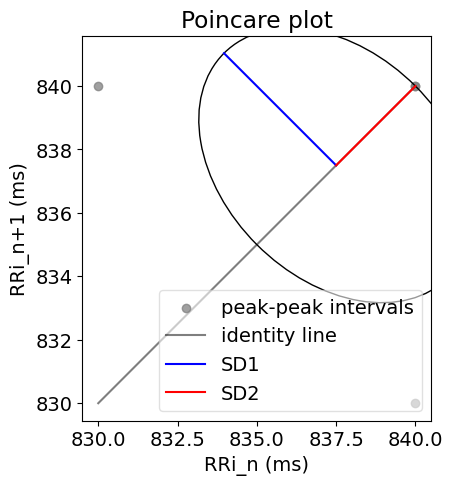

In [6]:
filtered = filter_and_visualise(ecg, sample_rate)

wd, m = hp.process(hp.scale_data(filtered), sample_rate)

plt.figure(figsize=(12,4))
hp.plotter(wd, m)

for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

#plot poincare
hp.plot_poincare(wd, m)

bpm: 71.525332
ibi: 838.863636
sdnn: 2.689127
sdsd: 2.076656
rmssd: 3.446012
pnn20: 0.000000
pnn50: 0.000000
hr_mad: 2.500000
sd1: 2.378287
sd2: 2.430278
s: 18.158087
sd1/sd2: 0.978607
breathingrate: 0.216779
sd1: 2.378287
sd2: 2.430278
s: 18.158087
sd1/sd2: 0.978607


<Figure size 1200x400 with 0 Axes>

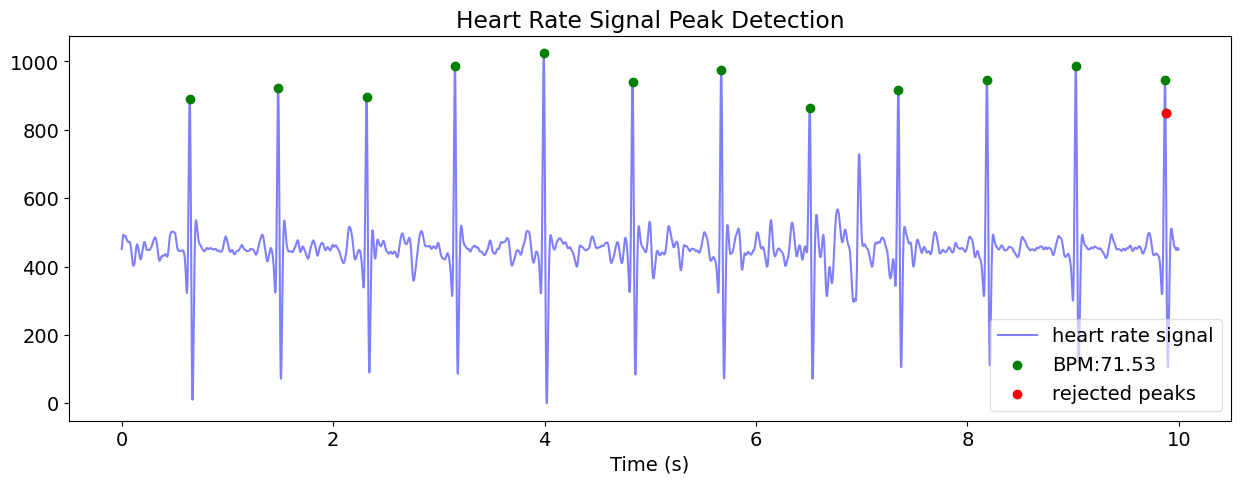

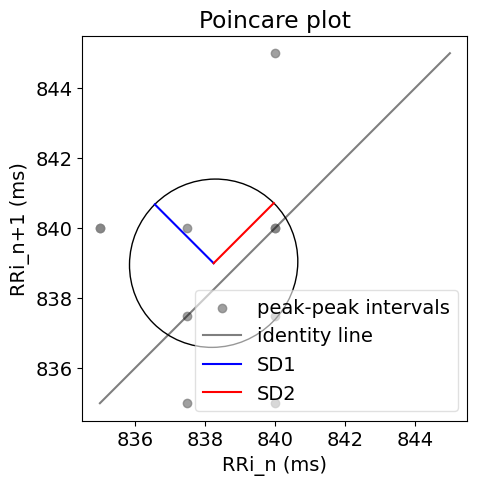

In [7]:
from scipy.signal import resample

resampled_signal = resample(filtered, len(filtered) * 4)

wd, m = hp.process(hp.scale_data(resampled_signal), sample_rate * 4)

plt.figure(figsize=(12,4))
hp.plotter(wd, m)

for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

#plot poincare
hp.plot_poincare(wd, m)

poincare_measures = ['sd1', 'sd2', 's', 'sd1/sd2']
for measure in poincare_measures:
    print('%s: %f' %(measure, m[measure]))

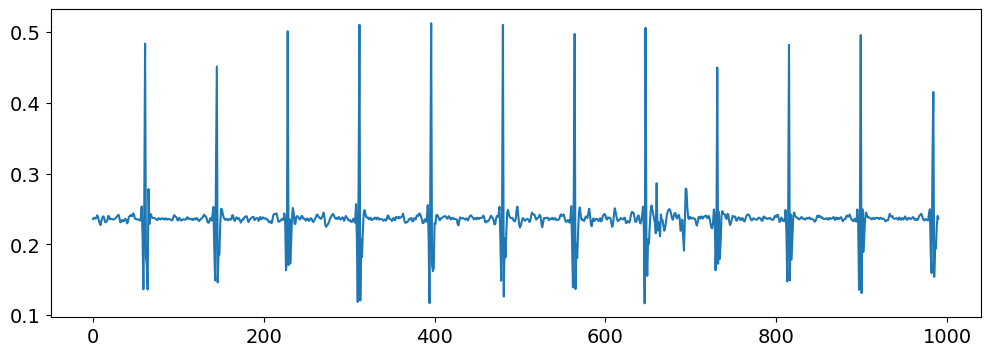

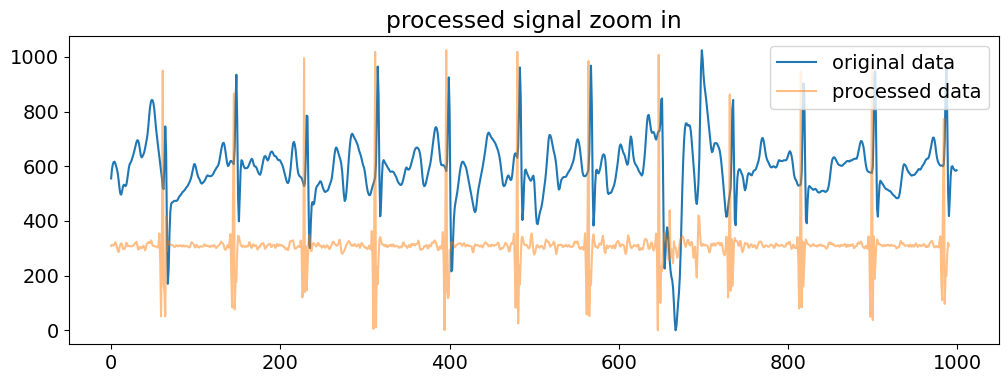

In [8]:
filtered = hp.enhance_ecg_peaks(hp.scale_data(ecg), sample_rate,
                                aggregation='median', iterations=5)

#show filtered signal
plt.figure(figsize=(12,4))
plt.plot(filtered)
plt.show()

#zoom in on signal section and overlay filtered segment
plt.figure(figsize=(12,4))
plt.title('original signal zoom in')
plt.plot(hp.scale_data(ecg), label='original data')
plt.title('processed signal zoom in')
plt.plot(hp.scale_data(filtered), alpha=0.5, label='processed data')
plt.legend()
plt.show()

bpm: 71.521456
ibi: 838.909091
sdnn: 4.144099
sdsd: 3.080584
rmssd: 5.128353
pnn20: 0.000000
pnn50: 0.000000
hr_mad: 1.000000
sd1: 3.570014
sd2: 3.993119
s: 44.784946
sd1/sd2: 0.894041
breathingrate: 0.216732
sd1: 3.570014
sd2: 3.993119
s: 44.784946
sd1/sd2: 0.894041


<Figure size 1200x400 with 0 Axes>

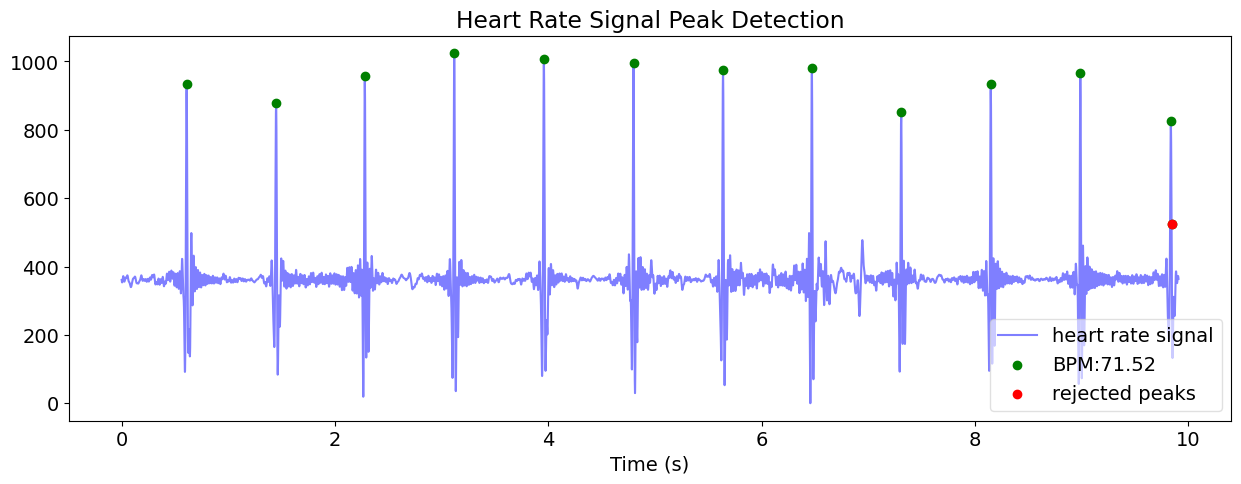

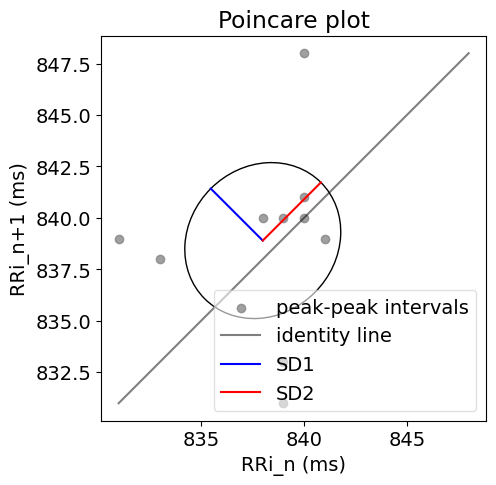

In [9]:
resampled_signal = resample(filtered, len(filtered) * 10)

wd, m = hp.process(hp.scale_data(resampled_signal), sample_rate * 10)

plt.figure(figsize=(12,4))
hp.plotter(wd, m)

for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

#plot poincare
hp.plot_poincare(wd, m)

poincare_measures = ['sd1', 'sd2', 's', 'sd1/sd2']
for measure in poincare_measures:
    print('%s: %f' %(measure, m[measure]))

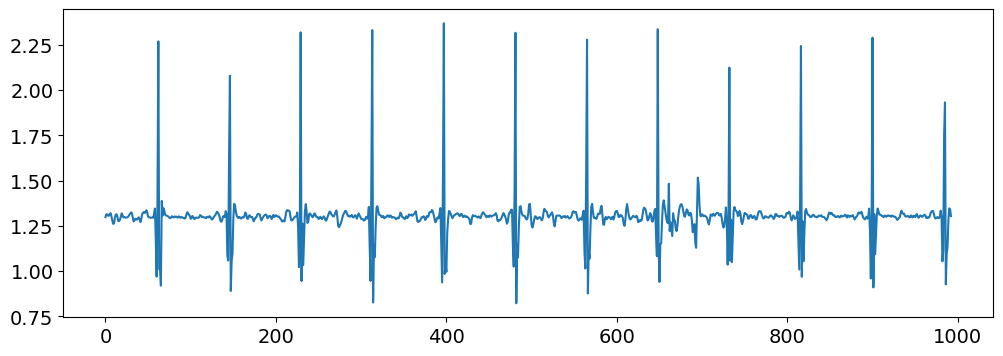

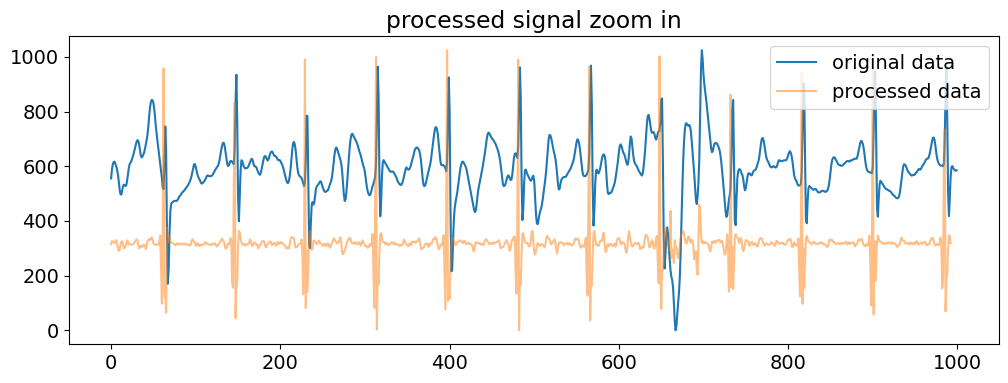

In [10]:
filtered = hp.enhance_ecg_peaks(hp.scale_data(ecg), sample_rate,
                                aggregation='median', iterations=4)

plt.figure(figsize=(12,4))
plt.plot(filtered)
plt.show()

plt.figure(figsize=(12,4))
#plt.subplot(211)
plt.title('original signal zoom in')
plt.plot(hp.scale_data(ecg), label='original data')
#plt.subplot(212)
plt.title('processed signal zoom in')
plt.plot(hp.scale_data(filtered), alpha=0.5, label='processed data')
plt.legend()
plt.show()

bpm: 71.529208
ibi: 838.818182
sdnn: 4.085855
sdsd: 3.458323
rmssd: 5.138093
pnn20: 0.000000
pnn50: 0.000000
hr_mad: 1.000000
sd1: 3.563706
sd2: 3.831449
s: 42.895799
sd1/sd2: 0.930120
breathingrate: 0.216755
sd1: 3.563706
sd2: 3.831449
s: 42.895799
sd1/sd2: 0.930120


<Figure size 1200x400 with 0 Axes>

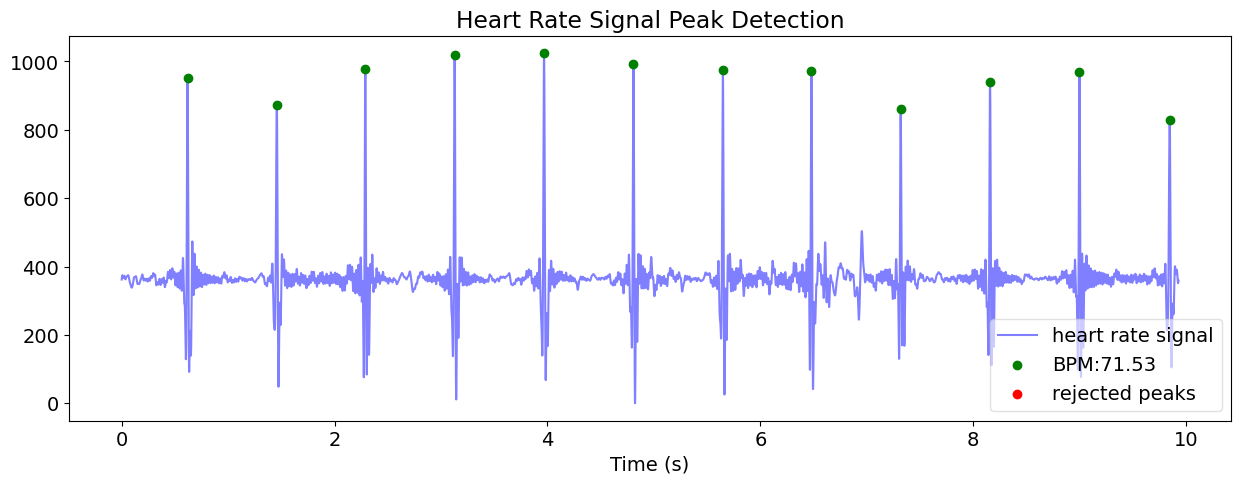

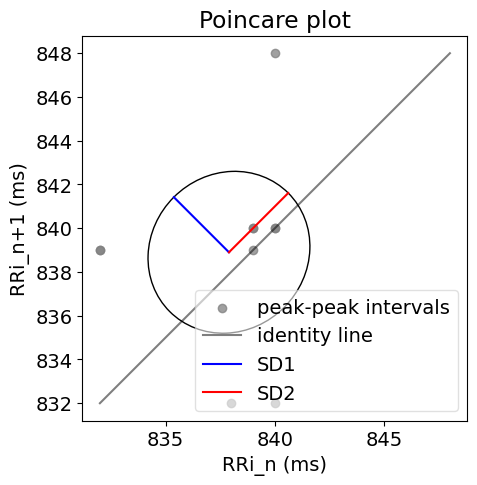

In [11]:
#filtered = hp.filter_signal(filtered, 0.05, sample_rate, filtertype='notch')

resampled_signal = resample(filtered, len(filtered) * 10)

wd, m = hp.process(hp.scale_data(resampled_signal), sample_rate * 10)

plt.figure(figsize=(12,4))
hp.plotter(wd, m)

for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

#plot poincare
hp.plot_poincare(wd, m)

poincare_measures = ['sd1', 'sd2', 's', 'sd1/sd2']
for measure in poincare_measures:
    print('%s: %f' %(measure, m[measure]))

bpm: 71.599045
ibi: 838.000000
sdnn: 4.000000
sdsd: 5.000000
rmssd: 7.071068
pnn20: 0.000000
pnn50: 0.000000
hr_mad: 0.000000
sd1: 5.000000
sd2: 3.535534
s: 55.536037
sd1/sd2: 1.414214
breathingrate: 0.238663
sd1: 5.000000
sd2: 3.535534
s: 55.536037
sd1/sd2: 1.414214


<Figure size 1200x400 with 0 Axes>

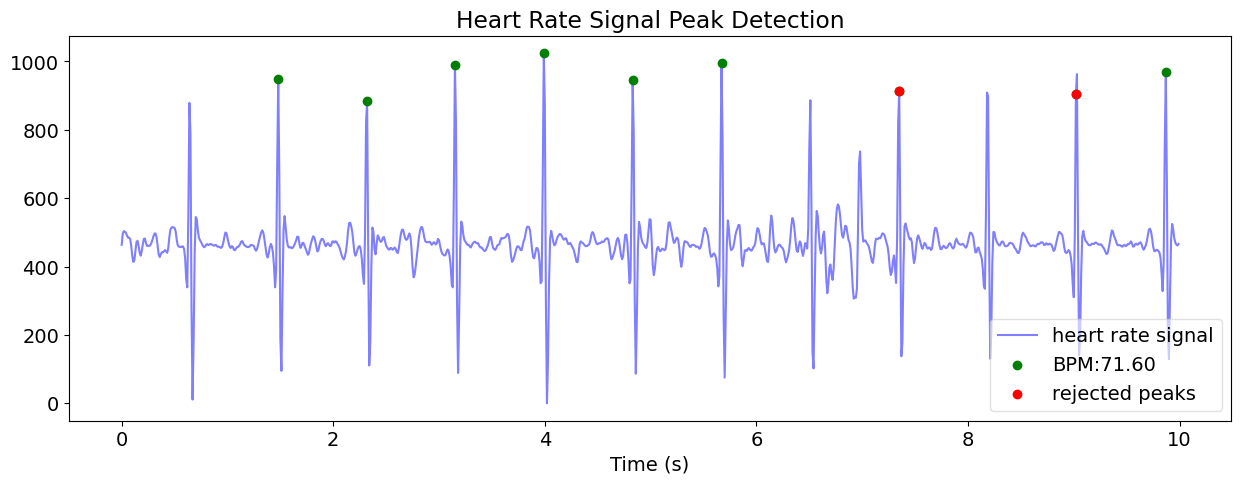

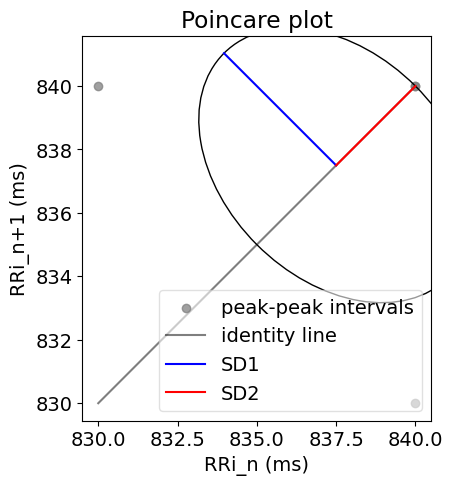

In [12]:
filtered = hp.filter_signal(ecg[0:14500], 0.05, sample_rate, filtertype='notch')

wd, m = hp.process(hp.scale_data(filtered), sample_rate)

plt.figure(figsize=(12,4))
hp.plotter(wd, m)

for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

#plot poincare
hp.plot_poincare(wd, m)

poincare_measures = ['sd1', 'sd2', 's', 'sd1/sd2']
for measure in poincare_measures:
    print('%s: %f' %(measure, m[measure]))

bpm: 71.599045
ibi: 838.000000
sdnn: 4.000000
sdsd: 5.000000
rmssd: 7.071068
pnn20: 0.000000
pnn50: 0.000000
hr_mad: 0.000000
sd1: 5.000000
sd2: 3.535534
s: 55.536037
sd1/sd2: 1.414214
breathingrate: 0.238663
sd1: 5.000000
sd2: 3.535534
s: 55.536037
sd1/sd2: 1.414214


<Figure size 1200x400 with 0 Axes>

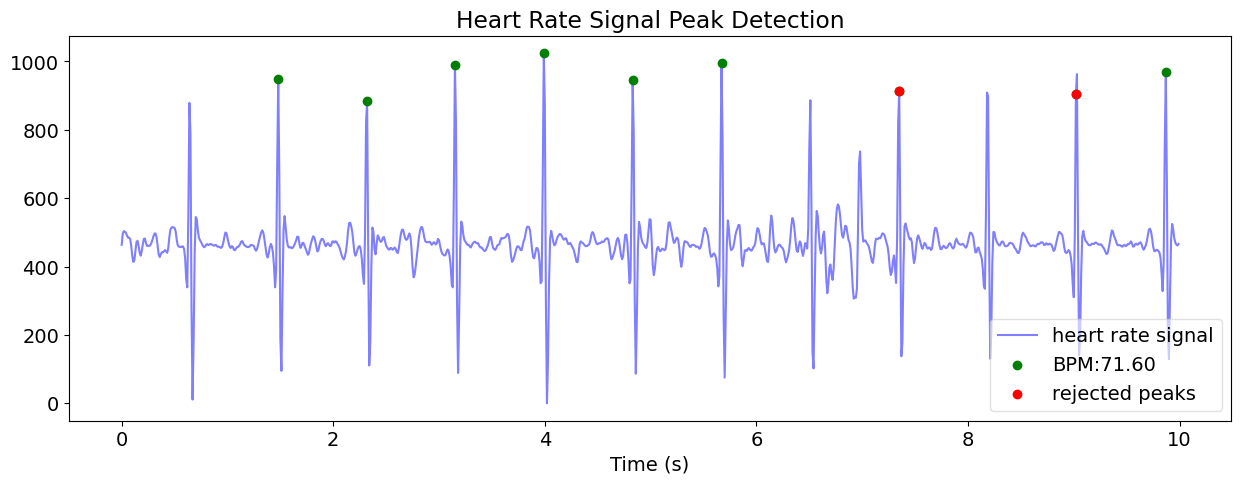

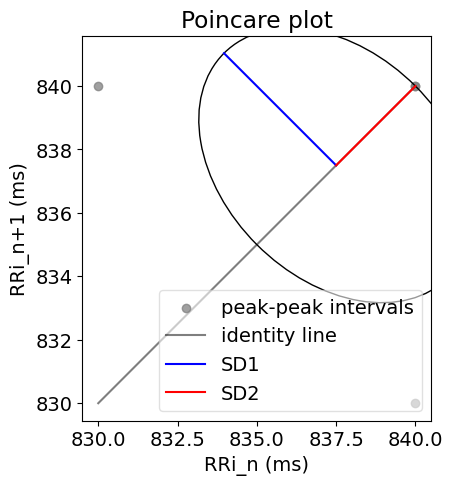

In [19]:
filtered = hp.filter_signal(ecg, 0.05, sample_rate, filtertype='notch')

wd, m = hp.process(hp.scale_data(filtered), sample_rate)

plt.figure(figsize=(12,4))
hp.plotter(wd, m)

for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

#plot poincare
hp.plot_poincare(wd, m)

poincare_measures = ['sd1', 'sd2', 's', 'sd1/sd2']
for measure in poincare_measures:
    print('%s: %f' %(measure, m[measure]))

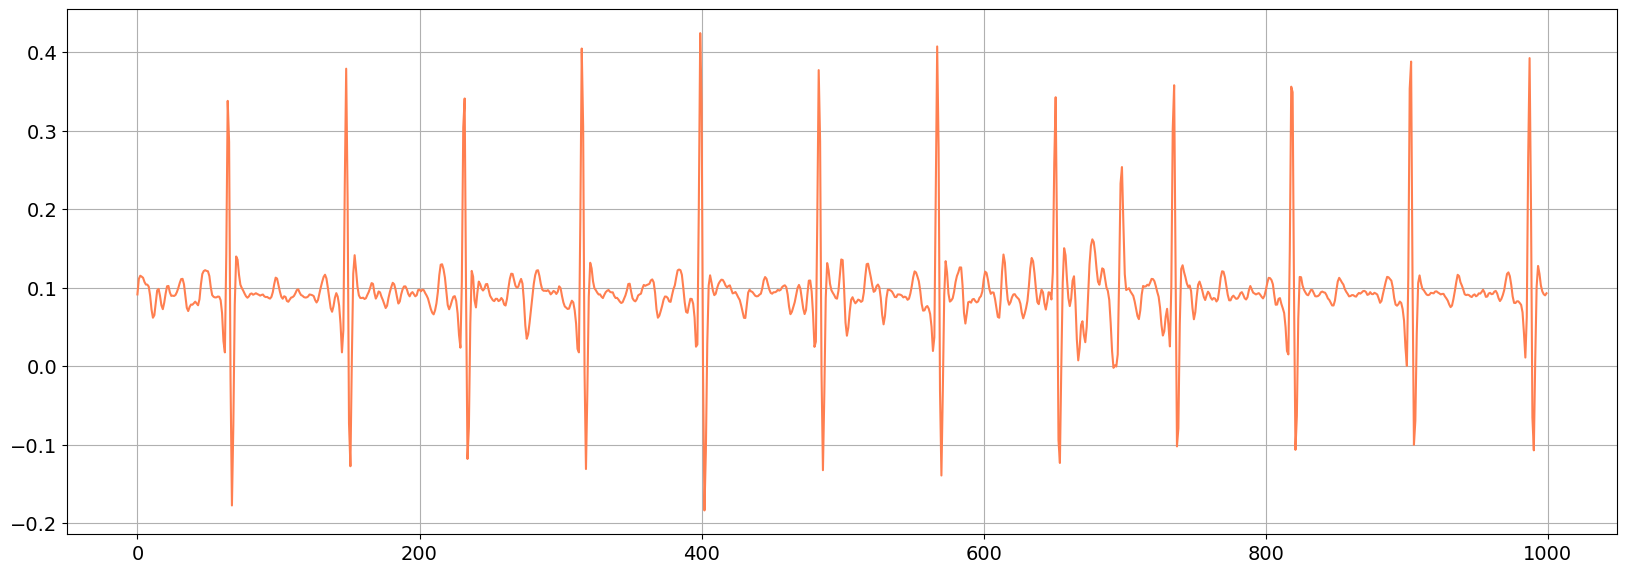

In [17]:
nrml_plt(filtered)